In [2]:
import sys
sys.path.append('/Users/theodorehuppert/Desktop/NIRS_Python/pyNIRS_toolbox')

import cedalion
import cedalion.datasets

# All the processing modules are in pipelines.modules
import pyBrainAnalyzIR
import pyBrainAnalyzIR.pipelines.modules.preproccessing as prep
import pyBrainAnalyzIR.pipelines.modules.filters as filters
import pyBrainAnalyzIR.pipelines.modules.motion_correction as moco
import pyBrainAnalyzIR.pipelines.modules.glm as stats

from pyBrainAnalyzIR.vis.plot_nirs_inline import plot as nirs_show
from pyBrainAnalyzIR.vis.report_stats_table import report_stats_table as stats_show

# This will allow matplotlib to work as a widget (needs "pip install ipympl")
%matplotlib widget

rec = cedalion.datasets.get_fingertapping()


In [3]:
# Just like in AnalyzIR, you can string module objects together to make full pipelines

job = prep.intensity_opticaldensity()
#job = filters.bandpass_filter(job)
job = prep.mbll(job)
job =prep.resample(job)
job.options['Fs']=1
job = moco.TDDR(job)
job = stats.GLM(job)
job.options['noise_model']='ar_irls'

rec=job.run(rec)

100%|██████████| 28/28 [00:09<00:00,  3.05it/s]


In [4]:
# This will get the concatinated dictionary of all options in the whole pipeline
options = job.get_all_options()
print(options)

# You can send the whole options dictionary or just part of it back.  All modules that use this variable will be updated
optionsNew={'Fs':1}
job.set_all_options(options)

{'spectrum': 'prahl', 'dpf': [6, 6], 'Fs': 1, 'split_PosNeg': True, 'usePCA': True, 'noise_model': 'ar_irls', 'ar_order': 30, 'max_jobs': 1, 'basis_function': <cedalion.models.glm.basis_functions.Gamma object at 0x1424e42d0>, 'Add_Short_Seperations': False, 'Short_Seperation_Max_Distance': <Quantity(1.5, 'centimeter')>, 'drift_order': 0, 'verbose': True}


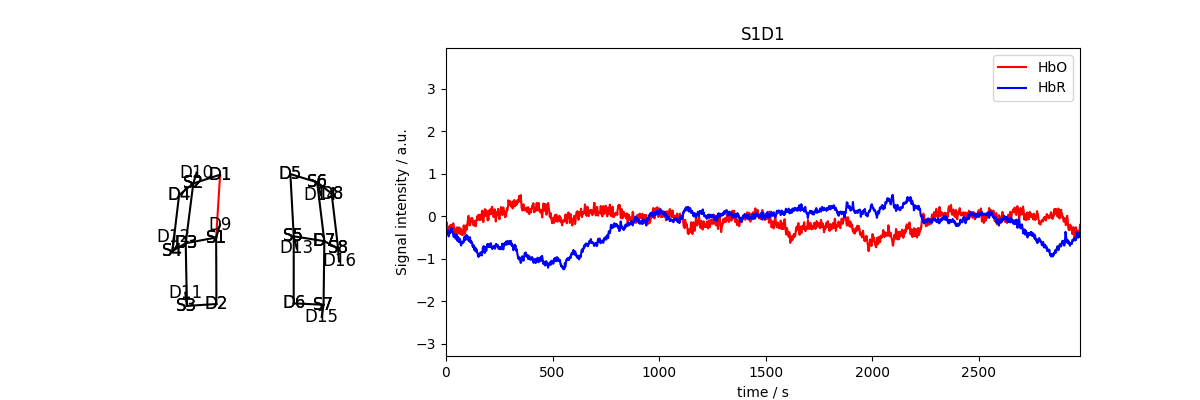

In [5]:
# This is my drawing code that gives a Homer-like GUI interface in the ipynb environment
nirs_show(rec,'conc')

In [6]:
stats_show(rec['stats'])

,Channels,Types,Conditions,Beta,StdErr,T-stat,p-value,dof
0,S1D1,HbO,HRF 1.0,-0.004374,0.016257,-0.269052,7.878899e-01,2970.0
1,S1D1,HbO,HRF 15.0,-0.037299,0.071005,-0.525300,5.993746e-01,2970.0
2,S1D1,HbO,HRF 2.0,0.062404,0.016257,3.838524,1.237760e-04,2970.0
3,S1D1,HbO,HRF 3.0,0.120261,0.016257,7.397387,1.388905e-13,2970.0
4,S1D1,HbO,Drift 0,-0.203157,0.000737,-275.763551,0.000000e+00,2970.0
...,...,...,...,...,...,...,...,...
275,S8D16,HbR,HRF 1.0,-0.000926,0.014374,-0.064389,9.486606e-01,2970.0
276,S8D16,HbR,HRF 15.0,0.138717,0.063986,2.167932,3.016385e-02,2970.0
277,S8D16,HbR,HRF 2.0,-0.027664,0.014374,-1.924576,5.428245e-02,2970.0
278,S8D16,HbR,HRF 3.0,-0.046510,0.014374,-3.235675,1.213555e-03,2970.0


In [7]:
stats=rec['stats']

In [12]:
pvals=stats.sm.__getattr__('pvalues')
pvals[:,0,pvals.regressor=='HRF 15.0']

<xarray.DataArray (channel: 28, regressor: 1)> Size: 224B
array([[0.59937459],
       [0.24640085],
       [0.85718918],
       [0.85056544],
       [0.23780263],
       [0.37061591],
       [0.2865222 ],
       [0.03062348],
       [0.26652477],
       [0.81833356],
       [0.67956826],
       [0.34991389],
       [0.08431916],
       [0.81988552],
       [0.08980193],
       [0.69792731],
       [0.3552523 ],
       [0.09086389],
       [0.89907259],
       [0.35018826],
       [0.91595987],
       [0.84648929],
       [0.71839368],
       [0.46767328],
       [0.51433625],
       [0.7340367 ],
       [0.73230614],
       [0.74103695]])
Coordinates:
  * regressor  (regressor) object 8B 'HRF 15.0'
    chromo     <U3 12B 'HbO'
  * channel    (channel) object 224B 'S1D1' 'S1D2' 'S1D3' ... 'S8D8' 'S8D16'
    source     (channel) object 224B 'S1' 'S1' 'S1' 'S1' ... 'S7' 'S8' 'S8' 'S8'
    detector   (channel) object 224B 'D1' 'D2' 'D3' 'D9' ... 'D7' 'D8' 'D16'
Attributes:
    description:  AR_IRLS